In [1]:
import tensorflow as tf
import numpy as np

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.experimental.set_virtual_device_configuration(
#             gpus[0],
#             [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)])
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)

In [2]:
# def read_data(filename):
#     training_file = open(filename, "r")
#     lines = training_file.read().split('\n')
    
#     data_all = []
#     for data_line in lines:
#         data_char = data_line.replace('[','').replace(']','').split()
#         data = np.asarray([float(char) for char in data_char])
#         data_all.append(data)
        
#     data_array = np.asarray(data_all)
#     return data_array
def read_data(filename):
    data_array = np.loadtxt(filename)
    return data_array

In [3]:
#get training and test data
from random import sample

data_array = read_data('/home/yunke/3dv_proj/0522/training_array_data.txt')
#data_test = read_data('/home/yunke/3dv_proj/0522/testing_data.txt')
print(data_array.shape)

all_index = np.arange(0,data_array.shape[0],1).tolist()
testing_index = sample(all_index,int(data_array.shape[0]/10))
training_index = list(set(all_index)-set(testing_index))

data_train = data_array[training_index,:]
data_test = data_array[testing_index,:]


print(data_train[0:5,:])


(855299, 18)
[[ 8.67000000e+02  7.10000000e+01  6.80685341e-01  6.86069973e-01
  -6.64762878e+01 -5.75216980e+01  6.10000000e+01  5.90000000e+01
   4.40000000e+01  2.40000000e+01  2.40000000e+01  3.00000000e+01
   2.96300000e+03  3.17800000e+03  2.62900000e+03 -1.30700000e+03
  -1.50600000e+03 -1.50500000e+03]
 [ 8.59000000e+02  7.50000000e+01  6.81278825e-01  6.85379975e-01
   3.27609863e+01  3.32374878e+01  3.40000000e+01  2.80000000e+01
   2.40000000e+01 -4.00000000e+00 -4.00000000e+00 -2.00000000e+00
   2.06000000e+02  2.47000000e+02  2.01000000e+02  5.40000000e+01
   3.10000000e+01 -2.30000000e+01]
 [ 8.51000000e+02  7.60000000e+01  6.80982172e-01  6.84686410e-01
  -2.41895447e+01  1.63808899e+01  1.21000000e+02  1.14000000e+02
   1.06000000e+02 -3.80000000e+01 -3.90000000e+01 -4.00000000e+01
  -2.68100000e+03 -2.82300000e+03 -2.51400000e+03  1.21700000e+03
   1.26700000e+03  1.01000000e+03]
 [ 8.56000000e+02  7.60000000e+01  6.80982113e-01  6.85120757e-01
   2.35222778e+01  2.676

In [4]:
x_index = [0,1,2]+np.arange(4,18,1).tolist()
X_train = data_train[:,x_index]
X_train[:,0]/=1280.
X_train[:,1]/=720.
X_train[:,[3,4]]/=500.
X_train[:,5:11]/=255.
X_train[:,11:]/=2000.
y_train = (data_train[:,3]-data_train[:,2])*5000
X_test = data_test[:,x_index]
X_test[:,0]/=1280.
X_test[:,1]/=720.
X_test[:,[3,4]]/=500.
X_test[:,5:11]/=255.
X_test[:,11:]/=2000.
y_test = (data_test[:,3]-data_test[:,2])*5000
print(X_train.shape)
print(X_test.shape)
print(testing_index[0:5])
print(X_train[0:5,:])

(769770, 17)
(85529, 17)
[6983, 560629, 749213, 383479, 443146]
[[ 0.67734375  0.09861111  0.68068534 -0.13295258 -0.1150434   0.23921569
   0.23137255  0.17254902  0.09411765  0.09411765  0.11764706  1.4815
   1.589       1.3145     -0.6535     -0.753      -0.7525    ]
 [ 0.67109375  0.10416667  0.68127882  0.06552197  0.06647498  0.13333333
   0.10980392  0.09411765 -0.01568627 -0.01568627 -0.00784314  0.103
   0.1235      0.1005      0.027       0.0155     -0.0115    ]
 [ 0.66484375  0.10555556  0.68098217 -0.04837909  0.03276178  0.4745098
   0.44705882  0.41568627 -0.14901961 -0.15294118 -0.15686275 -1.3405
  -1.4115     -1.257       0.6085      0.6335      0.505     ]
 [ 0.66875     0.10555556  0.68098211  0.04704456  0.05352344  0.1254902
   0.09019608  0.09019608  0.02352941  0.03529412  0.02352941 -0.1175
  -0.0875     -0.149       0.0245      0.0315      0.036     ]
 [ 0.675       0.10555556  0.68098211 -0.08094983 -0.04019006  0.35686275
   0.34117647  0.30196078 -0.01568627

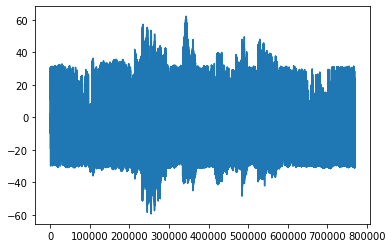

In [5]:
#data analysis
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.plot(y_train)
plt.show()



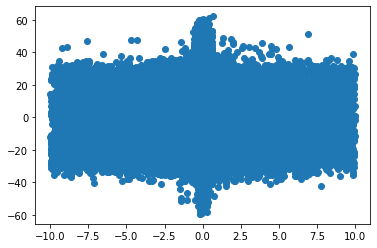

In [6]:
plt.scatter(X_train[:,3],y_train)
plt.show()

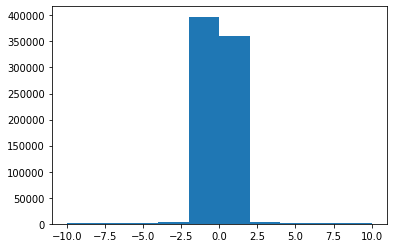

In [7]:
plt.hist(X_train[:,3])
plt.show()


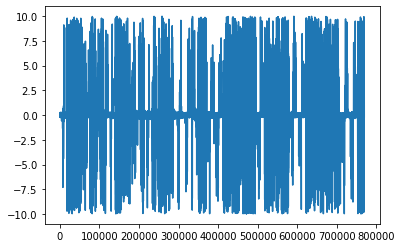

In [8]:
plt.plot(X_train[:,3])
plt.show()


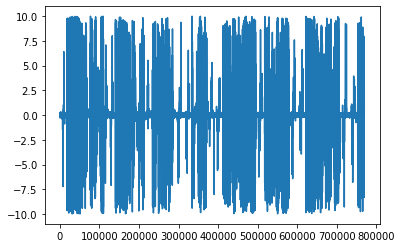

In [9]:
plt.plot(X_train[:,4])
plt.show()

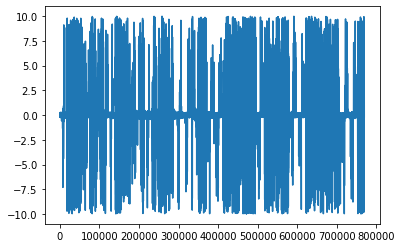

In [10]:
plt.plot(X_train[:,3])
plt.show()

In [17]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression



In [26]:
regr = RandomForestRegressor(n_estimators=16, max_depth=48, random_state=0,verbose=2)
regr.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 16


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  2.9min finished


RandomForestRegressor(max_depth=48, n_estimators=16, random_state=0, verbose=2)

In [27]:
y_pred = regr.predict(X_test)
print(y_pred[0:5])
print(sklearn.metrics.mean_squared_error(y_pred,y_test))
print(y_test[0:5])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[ -8.51937544   8.00094184 -18.34248751  14.33169985  -2.93419657]
84.80818865924856
[ -0.24512168   8.55969266 -16.6141519    0.75792485  -7.16886914]


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished


In [28]:
#save model
from joblib import dump, load
dump(regr, '/home/yunke/3dv_proj/bias correction/RF_learned_model.joblib') 

['/home/yunke/3dv_proj/bias correction/RF_learned_model.joblib']

In [16]:
#model = tf.keras.models.load_model('/home/yunke/3dv_proj/bias correction/learned_model')
y = model.predict(X_train)

[[ 0.87859094]
 [ 9.841019  ]
 [ 7.1547756 ]
 [10.815375  ]
 [11.061342  ]
 [ 8.970021  ]
 [ 5.5461674 ]
 [ 9.426523  ]
 [ 7.7923813 ]
 [ 6.064971  ]
 [ 7.0067005 ]
 [ 7.0106153 ]
 [ 4.8347244 ]
 [ 9.976785  ]
 [-1.9437962 ]
 [-8.158149  ]
 [-0.45888984]
 [ 1.1597904 ]
 [-4.1405344 ]
 [-4.671894  ]]


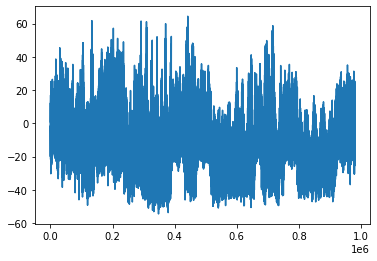

In [17]:
print(y[0:20])
plt.plot(y)
plt.show()


[17.39249442 16.97372094 20.50575009 16.99027715 21.3080518  15.07917016
 22.25442098 33.70458118 26.10971714 26.54539325  7.85517574 22.27127965
 17.97777628 10.03605777 11.78388304 15.12912538 25.85752142  5.52792234
  3.87944126 29.24687672]


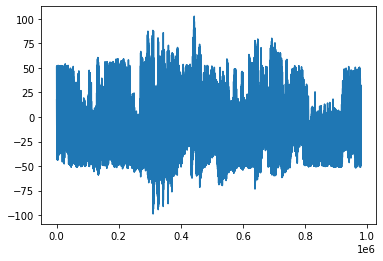

In [18]:
print(y_train[0:20])
plt.plot(y_train)
plt.show()